In [1]:
from main import KMeans 
from util import show_images 

import numpy as np 
from sklearn import datasets 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns 

from tqdm import tqdm 
from typing import List

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline 

# 1. 28x28 grayscale mnist dataset

## 1.1. Load dataset

In [63]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 1.2. Plotting images 

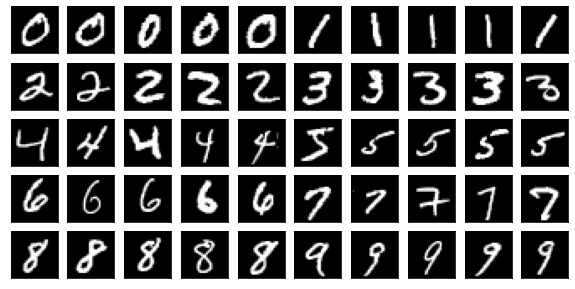

In [64]:
samples = []
for i in range(10): 
    for x in X_train[y_train == i][:5]: 
        samples.append(x)

show_images(samples, 5, 10, scale=1)

## 1.3. Fit KMeans algorithm 

In [99]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print(X.shape)
print(y.shape)

(70000, 28, 28)
(70000,)


In [100]:
X = X.reshape(X.shape[0], -1)
print(X.shape)

kmeans = KMeans(K=10)
kmeans.fit(X, max_iter=300)

(70000, 784)


 23%|██████████████████▋                                                              | 69/300 [01:03<03:32,  1.09it/s]

The algorithm terminates at 69th iteration.


In [101]:
centers = kmeans.centers[-1]
labels = kmeans.labels[-1]

print(centers.shape)
print(labels.shape)

(10, 784)
(70000,)


Cluster centers learned by KMeans algorithm:


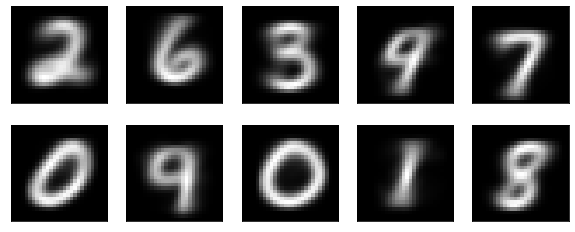

In [102]:
print("Cluster centers learned by KMeans algorithm:")
show_images(centers.reshape(-1, 28, 28), 2, 5, fig_name='digit_centers_28x28.jpg')

## 1.4. Infer true labels from learned labels 

In [103]:
# change the learned labels to their right labels, i.e, permuted the labels to the their rights identity 
true_labels = np.zeros_like(labels)
for i in range(10): 
    mask = (labels == i)                               # get all the data predicted to be in cluster i
    true_labels[mask] = mode(y[mask])[0]   # replace the current label with the true label

## 1.5. Check accuracy

In [104]:
accuracy_score(y, true_labels)

0.6363285714285715

In [105]:
mat = confusion_matrix(y, true_labels)
print(mat)

[[6191   28   27  209   56    0  202    4  186    0]
 [   0 7737   63   12   20    0   14    5   26    0]
 [ 133  835 4897  394  204    0  221  116  190    0]
 [ 144  490  296 4696  221    0   61   51 1182    0]
 [  20  215   35    0 6414    0  124    6   10    0]
 [ 329  945   26 2051 1119    0  124   20 1699    0]
 [ 269  575  108   32  116    0 5659    0  117    0]
 [  30  552   70    5 1705    0    5 4892   34    0]
 [  84  669   81 1318  530    0   52   34 4057    0]
 [  67  266   11   94 6179    0    8  255   78    0]]


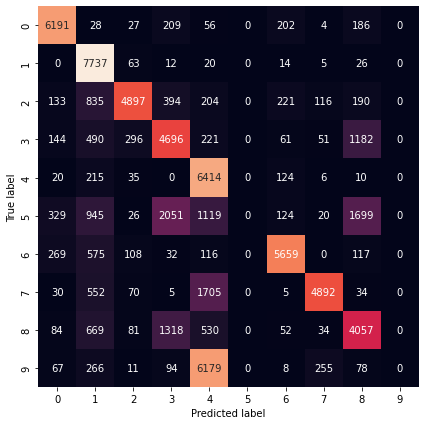

In [106]:
plt.figure(figsize=(7, 7))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
            yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# 2. 8x8 grayscale mnist dataset

## 2.1. Load dataset

In [74]:
digits = datasets.load_digits()
data = digits.data
data.shape

(1797, 64)

## 2.2. Plotting images 

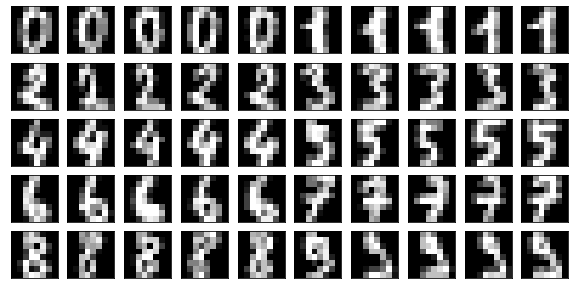

In [75]:
samples = []
for i in range(10): 
    for x in data[digits.target == i][:5]: 
        samples.append(x)

samples = np.array(samples)
samples = samples.reshape(-1, 8, 8)
show_images(samples, 5, 10, scale=1)

## 2.3. Fit the model

In [76]:
kmeans = KMeans(K=10)
kmeans.fit(data, max_iter=150)

 12%|█████████▌                                                                      | 18/150 [00:00<00:00, 349.14it/s]

The algorithm terminates at 18th iteration.


In [77]:
centers = kmeans.centers[-1]
labels = kmeans.labels[-1]

print(centers.shape)
print(labels.shape)

(10, 64)
(1797,)


Cluster centers learned by KMeans:


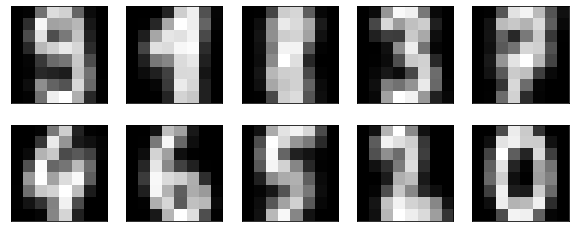

In [78]:
print("Cluster centers learned by KMeans:")
show_images(centers.reshape(-1, 8, 8), 2, 5, fig_name='digit_centers_8x8.jpg')

## 2.4. Infer true labels from learned labels 

In [79]:
# change the learned labels to their right labels, i.e, permuted the labels to the their right identity 
true_labels = np.zeros_like(labels)
for i in range(10): 
    mask = (labels == i)                               # get all the data predicted to be in cluster i
    true_labels[mask] = mode(digits.target[mask])[0]   # replace the current label with the true label

## 2.5. Check the accuracy of our unsupervised clustering 

In [80]:
accuracy_score(digits.target, true_labels)

0.7952142459654981

Check the confusion matrix:

In [81]:
mat = confusion_matrix(digits.target, true_labels)
print(mat)

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   3   0   0 166   0   0  10   2   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   6   3   2   0   4   2   5 102  50]
 [  0  20   0   6   0   6   0   8   1 139]]


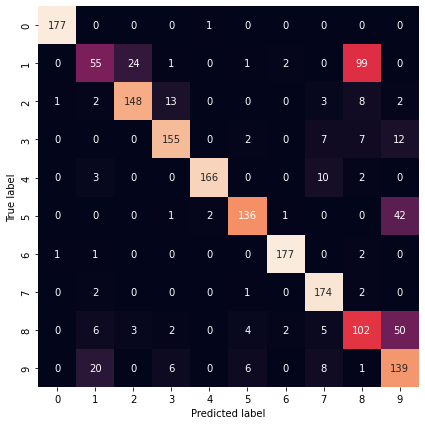

In [82]:
plt.figure(figsize=(7, 7))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=digits.target_names, 
            yticklabels=digits.target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()